In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('processed_orders.parquet')

In [3]:
# Проверка на наличие отрицательных значений в sum_byn
print("Проверка на отрицательные значения в 'Сумма, BYN':")
print(f"Количество отрицательных значений: {(df['Сумма, BYN'] < 0).sum()}")

Проверка на отрицательные значения в 'Сумма, BYN':
Количество отрицательных значений: 0


In [4]:
# Проверка на выбросы в столбце 'sum_byn'
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Фильтрация только верхних выбросов (так как отрицательных значений нет)
    outliers = data[data[column] > upper_bound]
    
    print(f"\nВыбросы в столбце {column}:")
    print(f"Нижняя граница: {lower_bound:.2f} (не применима, так как нет отрицательных значений)")
    print(f"Верхняя граница: {upper_bound:.2f}")
    print(f"Количество выбросов: {len(outliers)}")
    print(f"Минимальная сумма выброса: {outliers[column].min():.2f} BYN")
    print(f"Максимальная сумма выброса: {outliers[column].max():.2f} BYN")
    
    return outliers

In [5]:
# Проверка выбросов для 'sum_byn'
outliers_sum = detect_outliers_iqr(df, 'Сумма, BYN')


Выбросы в столбце Сумма, BYN:
Нижняя граница: -75.55 (не применима, так как нет отрицательных значений)
Верхняя граница: 168.16
Количество выбросов: 542
Минимальная сумма выброса: 168.60 BYN
Максимальная сумма выброса: 1356.82 BYN


In [6]:
# Проверка выбросов для 'profit'
outliers_profit = detect_outliers_iqr(df, 'Profit')


Выбросы в столбце Profit:
Нижняя граница: -17.99 (не применима, так как нет отрицательных значений)
Верхняя граница: 29.98
Количество выбросов: 275
Минимальная сумма выброса: 29.98 BYN
Максимальная сумма выброса: 231.60 BYN


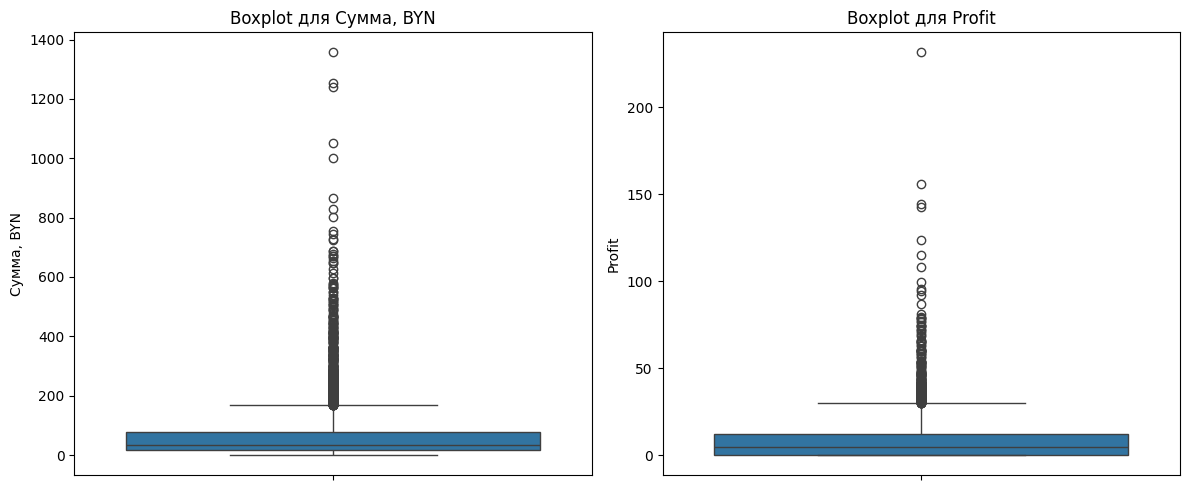

In [7]:
# Визуализация выбросов с помощью boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Сумма, BYN'])
plt.title('Boxplot для Сумма, BYN')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Profit'])
plt.title('Boxplot для Profit')

plt.tight_layout()
plt.show()

In [8]:
#Топ-10 клиентов с выбросами
top_customers = outliers_sum['Клиент'].value_counts().head(10)
print("Топ-10 клиентов с выбросами:", top_customers)

Топ-10 клиентов с выбросами: Клиент
Яголович Дмитрий    53
Васюто Виктор       35
Лихтарович Роман    35
Шкет Влад           16
Шоть Дмитрий        10
Тебеньков Вадим     10
Мороз Сергей        10
Гиль Денис           9
Колтун Фёдор         7
Горновский Иван      6
Name: count, dtype: int64


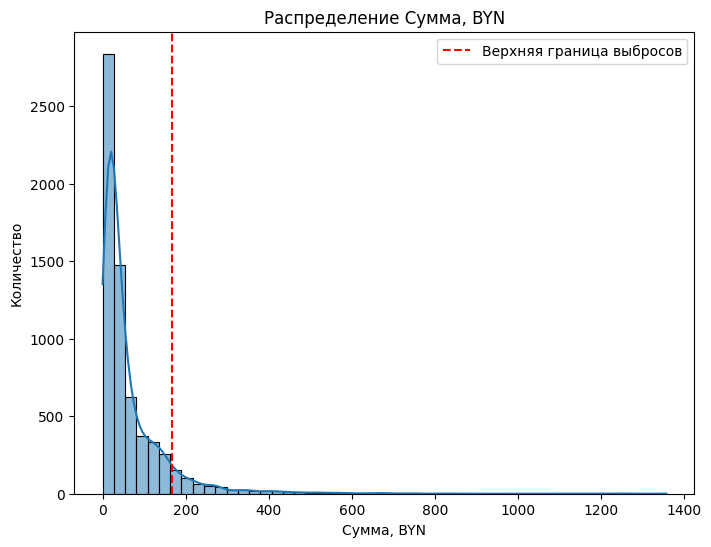

In [10]:
#Гистограмма чтобы увидеть распределение Суммы
plt.figure(figsize=(8, 6))
sns.histplot(df['Сумма, BYN'], bins=50, kde=True)
plt.axvline(168.16, color='red', linestyle='--', label='Верхняя граница выбросов')
plt.title('Распределение Сумма, BYN')
plt.xlabel('Сумма, BYN')
plt.ylabel('Количество')
plt.legend()
plt.show()

In [11]:
#Средний чек с выбросами и без них
print(f"Средний чек без выбросов: {df[df['Сумма, BYN'] <= 168.16]['Сумма, BYN'].mean():.2f} BYN")
print(f"Средний чек с выбросами: {df['Сумма, BYN'].mean():.2f} BYN")

Средний чек без выбросов: 43.52 BYN
Средний чек с выбросами: 64.18 BYN
